<a href="https://colab.research.google.com/github/acrizzijr/vivencial_Employee_Turnover_with_scikit-learn/blob/main/Predict_Employee_Turnover_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://rhyme.com/assets/img/logo-dark.png" align=center></img>
<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 21.9 MB 140 kB/s
     |████████████████████████████████| 102 kB 22.5 MB/s 
     |████████████████████████████████| 690 kB 49.1 MB/s 
     |████████████████████████████████| 4.7 MB 34.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 51.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=f61311c0da24fa990f2241427c74229f468a7da8dbcd6dfc8c58db834a96e782
  Stored in directory: /tmp/pip-ephem-wheel-cache-59rd5w7o/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=19f06c521304bd6cb55fdf45b8c4b1a74ad6dbb81ba1b21aa7502cc8bb7fd964
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehas

In [2]:
# !pip install pandas_profiling
# !pip install graphviz
# !pip install imblearn
# !pip install yellowbrick

### Task 1: Import Libraries
---

In [3]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [4]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [5]:
url = 'https://raw.githubusercontent.com/acrizzijr/vivencial_Employee_Turnover_with_scikit-learn/main/employee_data.csv'
rh = pd.read_csv(url)
rh.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [6]:
rh.profile_report(title = "Data Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

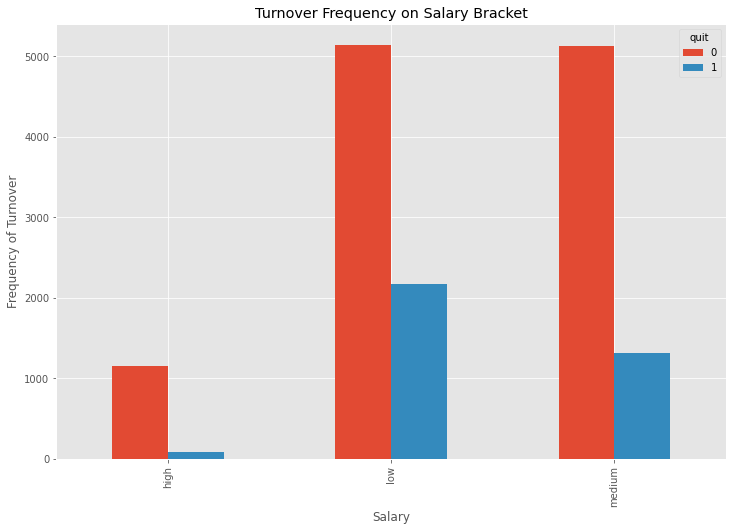

In [7]:
pd.crosstab(rh.salary, rh.quit).plot(kind='bar')
plt.title("Turnover Frequency on Salary Bracket")
plt.xlabel("Salary")
plt.ylabel("Frequency of Turnover")
plt.show();

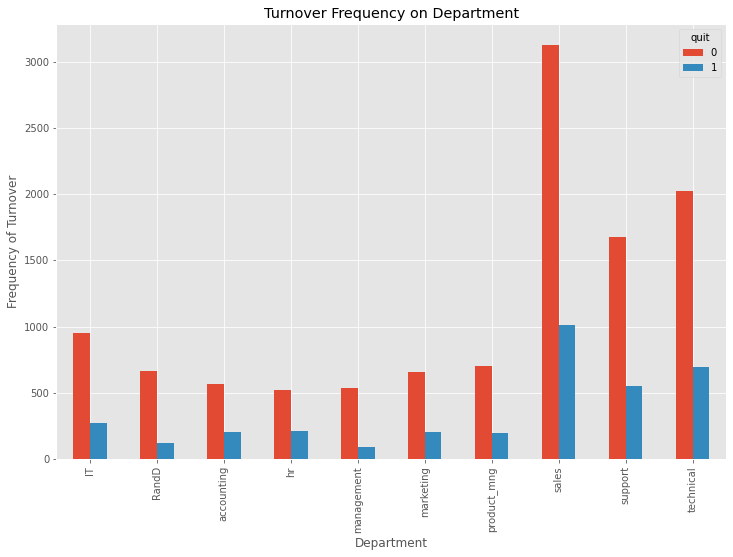

In [8]:
pd.crosstab(rh.department, rh.quit).plot(kind='bar')
plt.title("Turnover Frequency on Department")
plt.xlabel("Department")
plt.ylabel("Frequency of Turnover")
plt.show();


### Task 3: Encode Categorical Features
---

In [9]:
cat_vars = ['department', 'salary']
for var in cat_vars:
    cat_list = pd.get_dummies( rh[var], prefix= var)
    rh = rh.join(cat_list)

In [10]:
rh.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  ...  department_hr  department_management  department_marketing  \
0     low  ...              0                      0                     0   
1  medium  ...              0                      0                     0   
2  medium  ...              0                      0                     0   
3     low  ...              0                      0                     0   
4     low  ...              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  

[5 rows x 23 columns]

In [11]:
rh.drop(columns= ['department', 'salary'], axis=1, inplace= True)

In [12]:
rh.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   department_IT  department_RandD  ...  department_hr  department_management  \
0              0                 0  ...              0                      0   
1              0                 0  ...              0                      0   
2              0                 0  ...              0                      0   
3              0                 0  ...              0                      0   
4              0                 0  ...              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0  

[5 rows x 21 columns]

### Task 4: Visualize Class Imbalance
---

In [13]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

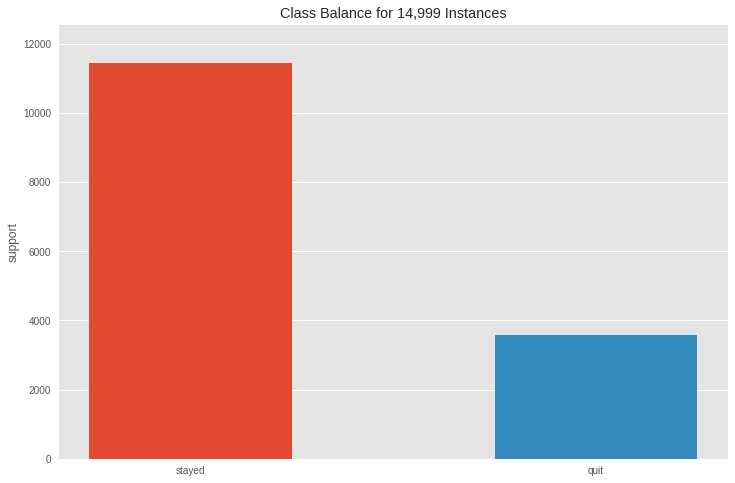

In [14]:
visualizer = ClassBalance(labels=['stayed', 'quit']).fit(rh.quit)
visualizer.show()

### Task 5: Create Training and Test Sets
---

In [15]:
X = rh.loc[:, rh.columns != 'quit']
y = rh.quit

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y )

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](assets/images/partition-feature-space.png)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [31]:
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=20,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion = crit,
                                       splitter = split,
                                       max_depth= depth,
                                       min_samples_split= min_split,
                                       min_samples_leaf= min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Acuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Acuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

    graph = Source(tree.export_graphviz(estimator, out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'],
                                        filled = True))
    
    display(Image(data= graph.pipe(format='png')))

    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [32]:
@interact
def plot_tree_rf(crit= ['gini', 'entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=20,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = RandomForestClassifier(random_state=1,
                                       criterion= crit,
                                       bootstrap=bootstrap,
                                       n_estimators= forests,
                                       max_depth= depth,
                                       min_samples_split= min_split,
                                       min_samples_leaf= min_leaf,
                                       n_jobs= -1,
                                       verbose= False)
    
    estimator.fit(X_train, y_train)

    print('Random Forests Training Acuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forests Test Acuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Tree', 0)

    graph = Source(tree.export_graphviz(num_tree, 
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'],
                                        filled = True))
    
    display(Image(data= graph.pipe(format='png')))

    return estimator 
    
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [26]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

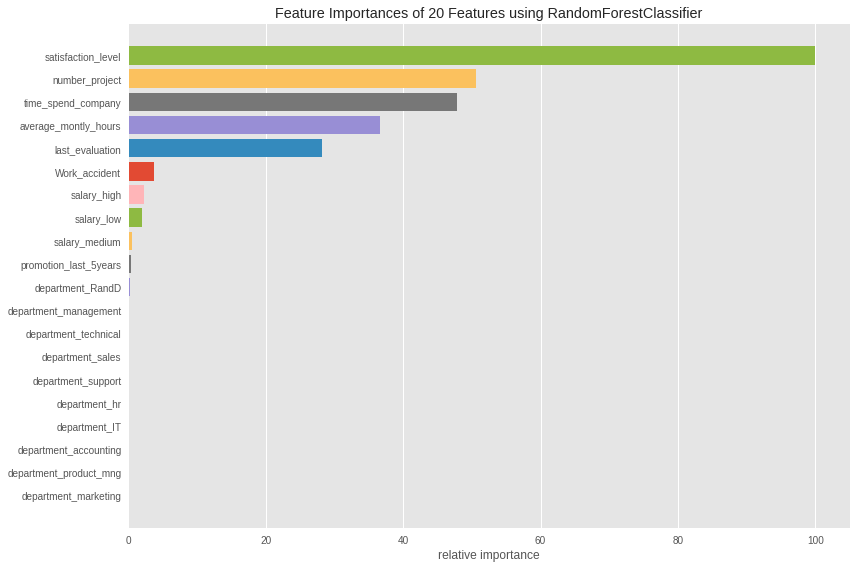

In [38]:
from yellowbrick.model_selection.importances import feature_importances

rf =RandomForestClassifier(bootstrap='True', max_depth=5, n_jobs=-1, random_state=1,
                       verbose=False)

vlz = FeatureImportances(rf)
vlz.fit(X_train, y_train)
vlz.show()

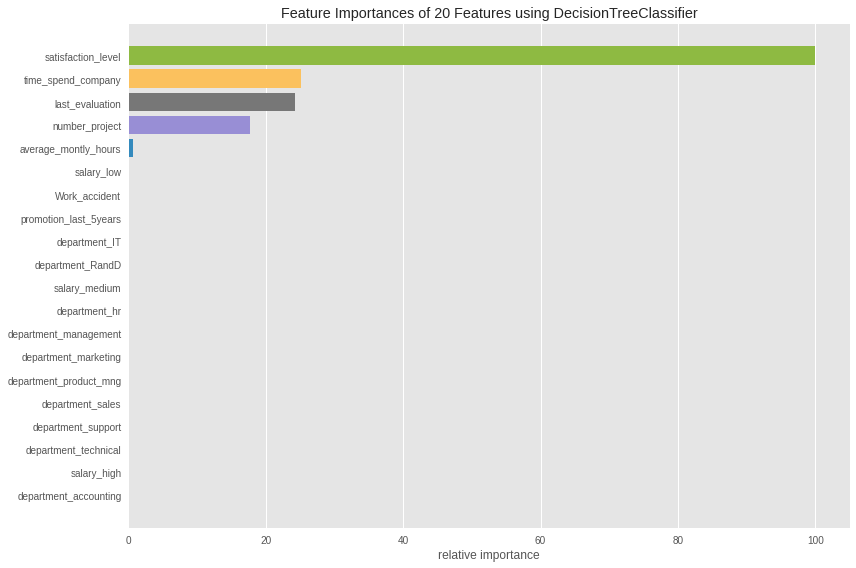

In [40]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

vlz1 = FeatureImportances(dt)
vlz1.fit(X_train, y_train)
vlz1.show()

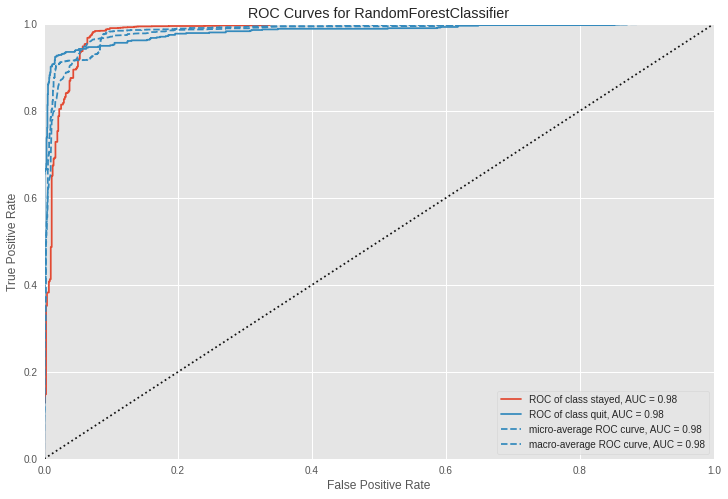

In [45]:
from yellowbrick.classifier import ROCAUC

visualizador = ROCAUC(rf, classes=['stayed', 'quit'])
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
visualizador.poof()

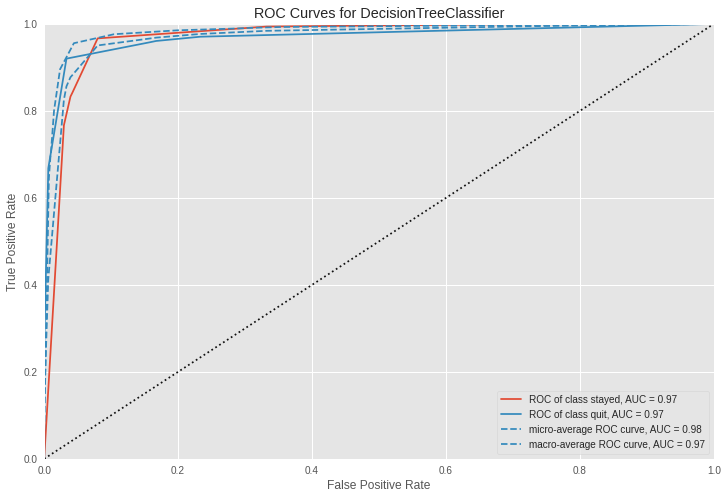

In [46]:

visualizador = ROCAUC(dt, classes=['stayed', 'quit'])
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
visualizador.poof()